In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import csv
import random
import operator
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [167]:
split = 0.2
df=pd.read_csv('admission_data.csv')
#target_mean=df['Chance of Admit '].mean()
#target_min=df['Chance of Admit '].min()
#target_max=df['Chance of Admit '].max()
#df=(df-df.mean())/(df.max()-df.min())
## denormalize predicted value ----> (normalized)*(max(x)-min(x))+mean(x)
Xdf=df[df.columns[[1,2,3,4,5,6,7]]]
print(type(Xdf))
ydf=df[df.columns[8]]
X=Xdf.values
X=(X-X.mean())/(X.max()-X.min())
y=ydf.values

for i in range(len(y)):
    if y[i]>=0.4:
        y[i]=1
    else:
        y[i]=0


print(y)

<class 'pandas.core.frame.DataFrame'>
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 

In [168]:
#train_df,validation_df = divide(df,validation_data_size=0.2)
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=5)

In [169]:
y_valid[0]

1.0

In [170]:
X_train.shape

(360, 7)

In [171]:
X_train=X_train.T
X_train.shape[0]

7

In [172]:
y_train.shape

(360,)

In [173]:
y_train=np.array([y_train])
y_train.shape

(1, 360)

In [174]:
X_valid=X_valid.T
X_valid.shape

(7, 90)

In [175]:
y_valid=np.array([y_valid])
y_valid.shape

(1, 90)

In [176]:
def init_parameters(lenw):
    w=np.random.randn(1,lenw)
    #w=np.zeros(1,lenw)
    #print("shape of theta vector:",w.shape)
    b=0
    return w,b

In [177]:
def get_prediction(X,w,b):
    z=np.dot(w,X)+b # z-->1xm
    return sigmoid_function(z)

In [178]:
def sigmoid_function(z):
    gz=1 / (1 + np.exp(-z))
    return gz 

In [179]:
def cost_function(z,y):
    m= y.shape[1]
    #print('m type:',type(m))
    #print('m type:',type(z))
    #print('m type:',type(y))
    #print('y shape',y.shape)
    #print('z-shape',z.shape)
    J = -(1/m)*np.sum(((y*np.log(z)) + (1-y)* np.log(1-z)))
    
    
    #J = (1/(2*m))*np.sum(np.square(z-y))
    #mean absolute error
    #J = (1/(2*m))*np.sum(np.absolute(z-y))
    #mean absolute percentage error
    #J = (100/(2*m))*np.sum(np.absolute((z-y)/z))
    return J

In [180]:
def get_partial_derivative_terms(X,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X.T)
    db=np.sum(dz)
    return dw,db

In [181]:
def gradient_descent_update(w,b,dw,db,alpha):
    w=w-alpha*dw
    b=b-alpha*db
    return w,b

In [182]:
def linear_regression(X_train,y_train,alpha,iterations):
    lenw=X_train.shape[0]
    w,b=init_parameters(lenw)
    m_train=y_train.shape[1]
    m_valid=y_valid.shape[1]
    costs_train=[]
    for i in range(iterations+1):
        z_train=get_prediction(X_train,w,b)
        cost_train=cost_function(z_train,y_train)
        dw,db=get_partial_derivative_terms(X_train,y_train,z_train)
        w,b=gradient_descent_update(w,b,dw,db,alpha)
        print(w.shape)
        
        theta_vector=np.copy(w)
        c_value=b
        #store training_cost in list
        if i%10==0:
            costs_train.append(cost_train)
        # Mean Absolute Error
        mae_train=(1/m_train)*np.sum(np.abs(z_train-y_train))
        
        #cost_val ,mae_val on validation data
        #z_valid=get_prediction(X_valid,w,b)
        #cost_valid=cost_function(z_valid,y_valid)
        #mae_valid=(1/m_valid)*np.sum(np.abs(z_valid-y_valid))
        print('Iteration:',i)
        print('Training cost:',cost_train)
        #print('validation cost:',cost_valid)
        print('Training MAE:',mae_train)
        #print('Validation MAE:',mae_valid)
        print('------------------------------')
    mlt.plot(costs_train)
    mlt.xlabel('Iterations (In 10s)')
    mlt.ylabel('Training cost')
    mlt.title('Learning rate'+str(alpha))
    mlt.show()
    return w,b
    

(1, 7)
Iteration: 0
Training cost: 0.5085236483603136
Training MAE: 0.3979846666545536
------------------------------
(1, 7)
Iteration: 1
Training cost: 0.49854892289294234
Training MAE: 0.39187852110241556
------------------------------
(1, 7)
Iteration: 2
Training cost: 0.4888992738490852
Training MAE: 0.38590771031031446
------------------------------
(1, 7)
Iteration: 3
Training cost: 0.4795622832637113
Training MAE: 0.3800699547654514
------------------------------
(1, 7)
Iteration: 4
Training cost: 0.47052600161409086
Training MAE: 0.3743628895341751
------------------------------
(1, 7)
Iteration: 5
Training cost: 0.46177893637888967
Training MAE: 0.3687840800341852
------------------------------
(1, 7)
Iteration: 6
Training cost: 0.4533100399406969
Training MAE: 0.36333103642693765
------------------------------
(1, 7)
Iteration: 7
Training cost: 0.4451086969864945
Training MAE: 0.35800122670080575
------------------------------
(1, 7)
Iteration: 8
Training cost: 0.437164711542

(1, 7)
Iteration: 341
Training cost: 0.09091653976195563
Training MAE: 0.06243491856834018
------------------------------
(1, 7)
Iteration: 342
Training cost: 0.09082523893157525
Training MAE: 0.06231923414397998
------------------------------
(1, 7)
Iteration: 343
Training cost: 0.0907345345291279
Training MAE: 0.06220418847571033
------------------------------
(1, 7)
Iteration: 344
Training cost: 0.09064442132565868
Training MAE: 0.0620897764125011
------------------------------
(1, 7)
Iteration: 345
Training cost: 0.09055489415068241
Training MAE: 0.06197599285788448
------------------------------
(1, 7)
Iteration: 346
Training cost: 0.09046594789138579
Training MAE: 0.06186283276924195
------------------------------
(1, 7)
Iteration: 347
Training cost: 0.09037757749184241
Training MAE: 0.061750291157102136
------------------------------
(1, 7)
Iteration: 348
Training cost: 0.09028977795224064
Training MAE: 0.061638363084449865
------------------------------
(1, 7)
Iteration: 349
Tr

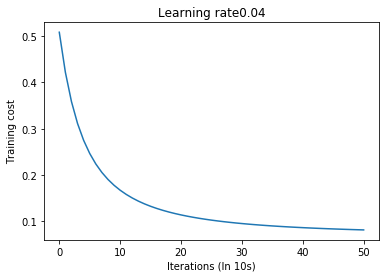

In [184]:
theta_vector,c_value=linear_regression(X_train,y_train,0.04,500)

In [185]:
print(theta_vector)
print(c_value)

[[ 1.40899069  2.08211744  0.02253177 -0.3319274  -1.73722436  0.60184879
  -0.21676938]]
1.6421979881730837


In [186]:
z_valid=get_prediction(X_valid,theta_vector,c_value)
cost_valid=cost_function(z_valid,y_valid)
print(cost_valid)
#print(cost_valid)
#print(df['Chance of Admit '].max())
#print(df['Chance of Admit '].min())
#print(df['Chance of Admit '].mean())
print(type(y_valid))
for i in range(len(z_valid[0])):
    if z_valid[0][i]<0.5:
        z_valid[0][i]=0.0
        print('predicted',z_valid[0][i])
    else:
        z_valid[0][i]=1.0
        print('predicted',z_valid[0][i])
    print('actual',y_valid[0][i])
    print('-----------')

0.07276012880679297
<class 'numpy.ndarray'>
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
-----------
predicted 1.0
actual 1.0
------

In [187]:
#a,b,c,d=score(z_valid,y_valid)
count=1

for i in range(len(z_valid[0])):
    print(z_valid[0][i])
    print(y_valid[0][i])
    print ('----')
print('Accuracy',(z_valid==y_valid).mean())
print('Precision',a[0])
print('Recall',b[0])
print('F1',c[0])

1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----
1.0
1.0
----